# Model 2
## Malaria Tespiti için Derin Öğrenme Modeli
https://www.kaggle.com/code/akshat0007/stay-safe-from-malaria

CNN With Custom Images

The dataset contains 2 folders
Infected
Uninfected
And a total of 27,558 images.

Please get this Dataset from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

or

https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Girdi dizinindeki dosyaları göster
print(os.listdir("../input")) 

# Matplotlib grafiklerinin stilini ayarla
sns.set_style({'xtick.bottom': False,
               'ytick.left': False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

['cell_images']


## Images which have been confirmed as infected

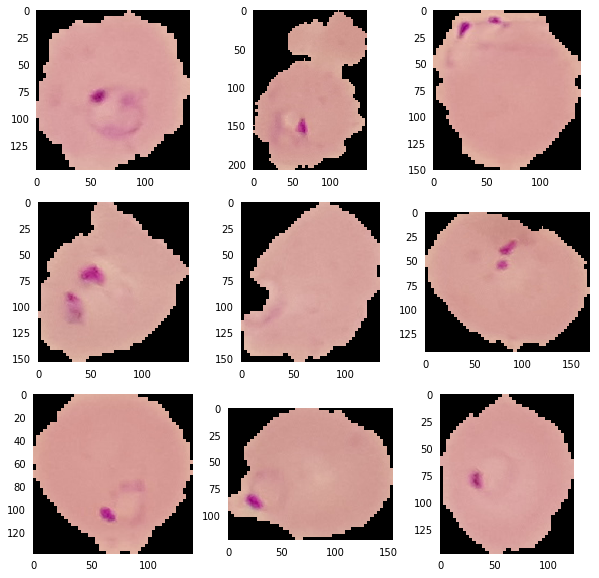

In [2]:
# Enfekte hücre görüntülerini göster 9 adet
im_list = [162 + i for i in range(9)]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i in enumerate(im_list):
    img = plt.imread("../input/cell_images/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_" + str(i[1]) + ".png")
    ax = axes[i[0] // 3, i[0] % 3]
    ax.imshow(img)

In [3]:
datagen = ImageDataGenerator(rescale=1./255,# Piksel değerlerini 0-1 aralığına ölçeklemek için
                                      zoom_range=0.2, # Resmi 0.2 oranında yakınlaştırma veya uzaklaştırma
                                      horizontal_flip=True, # Resimleri yatay olarak çevirme
                                      vertical_flip=True,  # Resimleri dikey olarak çevirme
                                      width_shift_range=0.2, # Resimleri yatay olarak 0.2 oranında kaydırma
                                      height_shift_range=0.2, # Resimleri dikey olarak 0.2 oranında kaydırma
                                      validation_split=0.2 # Veri setini %20 olarak ayırma
                                      )
train_data = datagen.flow_from_directory('../input/cell_images/cell_images', # Veri kümesi konumu
                                                     target_size=(64,64), # Resimlerin yeniden boyutlandırılacağı boyut
                                                     batch_size=128, # Her iterasyonda işlenecek örnek sayısı
                                                     class_mode = 'binary', # İkili sınıflandırma problemi
                                                     subset = 'training') # Eğitim kümesi

validation_data = datagen.flow_from_directory('../input/cell_images/cell_images',
                                                     target_size=(64,64),
                                                     batch_size=128,
                                                     class_mode = 'binary',
                                                     subset = 'validation') # Doğrulama kümesi

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [4]:
import tensorflow as tf

In [5]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),input_shape=(64,64,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['acc'])


In [7]:
history = model.fit_generator(train_data,
            validation_data = validation_data,
            epochs = 20,
            verbose = 1)

Epoch 1/20
173/173 [==============================] - 143s 829ms/step - loss: 0.6472 - acc: 0.6249 - val_loss: 0.7061 - val_acc: 0.5045
Epoch 2/20
173/173 [==============================] - 72s 417ms/step - loss: 0.4113 - acc: 0.8226 - val_loss: 0.2962 - val_acc: 0.8884
Epoch 3/20
173/173 [==============================] - 72s 415ms/step - loss: 0.2901 - acc: 0.8932 - val_loss: 0.2540 - val_acc: 0.8989
Epoch 4/20
173/173 [==============================] - 72s 419ms/step - loss: 0.2674 - acc: 0.9059 - val_loss: 0.2550 - val_acc: 0.9029
Epoch 5/20
173/173 [==============================] - 71s 411ms/step - loss: 0.2480 - acc: 0.9137 - val_loss: 0.2452 - val_acc: 0.9073
Epoch 6/20
173/173 [==============================] - 71s 412ms/step - loss: 0.2400 - acc: 0.9169 - val_loss: 0.2318 - val_acc: 0.9147
Epoch 7/20
173/173 [==============================] - 72s 416ms/step - loss: 0.2303 - acc: 0.9208 - val_loss: 0.2378 - val_acc: 0.9123
Epoch 8/20
173/173 [==============================] - 

## Plotting the training and validation accuracy with respect to the number of epochs

<Figure size 432x288 with 0 Axes>

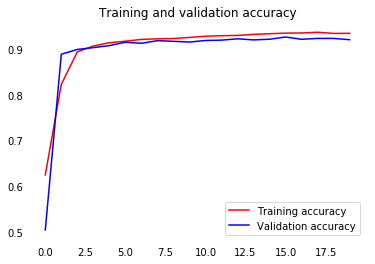

<Figure size 432x288 with 0 Axes>

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()